## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras
from keras import optimizers
# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
# 載入資料（將資料打散，放入 train 與 test 資料集）
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
# 圖像數值原本是0到255，將數值除以255，可以使數值介於0到1
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
# 用np_utils裡的to_categorical來做one-hot encoding的轉換：
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    # 模型輸入
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    # Dense是全連接層，該層的輸出維度512，激活函數='relu'
    x = keras.layers.Dense(units=256, activation="relu")(x)
    # Dense是全連接層，該層的輸出維度256，激活函數='relu'
    x = keras.layers.Dense(units=128, activation="relu")(x)
    # Dense是全連接層，該層的輸出維度128，激活函數='relu'
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    # Dense是全連接層，該層的輸出維度10，激活函數='relu'
    
    # 定義一個具有輸入和輸出的模型
    model = keras.models.Model(inputs=[input_layer], outputs=[out])


    return model
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [5]:
"""
Compile 模型
"""
optimizer =optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

'''
參數說明:
•lr：<float> 學習率。
• Momentum 動量：<float> 參數，用於加速 SGD 在相關方向上前進，並抑制震盪。
• Decay(衰變)：<float> 每次參數更更新後學習率衰減值。
• nesterov：布林值。是否使用 Nesterov 動量。
'''

'\n參數說明:\n•lr：<float> 學習率。\n• Momentum 動量：<float> 參數，用於加速 SGD 在相關方向上前進，並抑制震盪。\n• Decay(衰變)：<float> 每次參數更更新後學習率衰減值。\n• nesterov：布林值。是否使用 Nesterov 動量。\n'

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, # 訓練資料
          epochs=500,      # 訓練500週期，訓練集所有樣本（數據、記錄）參與訓練一次爲一個週期
          batch_size=256,      # 訓練時每個批次的樣本數。訓練樣本數/批次樣本數 = 批次數（每個週期）
          validation_data=(x_test, y_test),     # 驗證資料
          shuffle=True)                # 每次epochs後，將訓練集打亂順序
'''
注意：使用 validation_split 與 shuffle 時，
Keras 是先自 x_train/y_train 取最後 (1-x)% 做為驗證集使用，
再行 shuffle
'''

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 54us/step - loss: 2.0651 - accuracy: 0.2664 - val_loss: 2.0019 - val_accuracy: 0.2578
Epoch 2/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.8834 - accuracy: 0.3360 - val_loss: 1.8481 - val_accuracy: 0.3393
Epoch 3/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.8132 - accuracy: 0.3632 - val_loss: 1.8681 - val_accuracy: 0.3285
Epoch 4/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.7651 - accuracy: 0.3796 - val_loss: 1.7691 - val_accuracy: 0.3771
Epoch 5/500
50000/50000 [==============================] - 3s 50us/step - loss: 1.7290 - accuracy: 0.3923 - val_loss: 1.7437 - val_accuracy: 0.3756
Epoch 6/500
50000/50000 [==============================] - 2s 44us/step - loss: 1.6974 - accuracy: 0.4035 - val_loss: 1.8485 - val_accuracy: 0.3392
Epoch 7/500
50000/50000 [==============================] - 2s 

Epoch 56/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.1929 - accuracy: 0.5815 - val_loss: 1.4840 - val_accuracy: 0.4750
Epoch 57/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.1926 - accuracy: 0.5827 - val_loss: 1.4640 - val_accuracy: 0.4854
Epoch 58/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.1818 - accuracy: 0.5867 - val_loss: 1.4631 - val_accuracy: 0.4876
Epoch 59/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.1738 - accuracy: 0.5884 - val_loss: 1.3564 - val_accuracy: 0.5166
Epoch 60/500
50000/50000 [==============================] - 3s 50us/step - loss: 1.1691 - accuracy: 0.5915 - val_loss: 1.3849 - val_accuracy: 0.5150
Epoch 61/500
50000/50000 [==============================] - 3s 50us/step - loss: 1.1621 - accuracy: 0.5934 - val_loss: 1.5807 - val_accuracy: 0.4596
Epoch 62/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.1569 - accuracy: 0.5960

Epoch 111/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.8897 - accuracy: 0.6924 - val_loss: 1.5451 - val_accuracy: 0.4902
Epoch 112/500
50000/50000 [==============================] - 3s 50us/step - loss: 0.8810 - accuracy: 0.6949 - val_loss: 1.4629 - val_accuracy: 0.5201
Epoch 113/500
50000/50000 [==============================] - 3s 50us/step - loss: 0.8783 - accuracy: 0.6947 - val_loss: 1.4182 - val_accuracy: 0.5217
Epoch 114/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.8704 - accuracy: 0.6991 - val_loss: 1.5019 - val_accuracy: 0.5025
Epoch 115/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.8611 - accuracy: 0.7009 - val_loss: 1.4999 - val_accuracy: 0.5042
Epoch 116/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.8535 - accuracy: 0.7047 - val_loss: 1.5989 - val_accuracy: 0.4862
Epoch 117/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.8619 - accuracy:

Epoch 220/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.3783 - accuracy: 0.8780 - val_loss: 2.1611 - val_accuracy: 0.4947
Epoch 221/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.3413 - accuracy: 0.8966 - val_loss: 1.9766 - val_accuracy: 0.5252
Epoch 222/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.3422 - accuracy: 0.8911 - val_loss: 1.9737 - val_accuracy: 0.5193
Epoch 223/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.3311 - accuracy: 0.8943 - val_loss: 1.9361 - val_accuracy: 0.5173
Epoch 224/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.4054 - accuracy: 0.8731 - val_loss: 1.9165 - val_accuracy: 0.5261
Epoch 225/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.3571 - accuracy: 0.8855 - val_loss: 1.8181 - val_accuracy: 0.5342
Epoch 226/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.3425 - accuracy:

Epoch 329/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.0544 - accuracy: 0.9929 - val_loss: 2.4379 - val_accuracy: 0.5404
Epoch 330/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.3307 - accuracy: 0.9161 - val_loss: 2.5939 - val_accuracy: 0.5036
Epoch 331/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.0909 - accuracy: 0.9806 - val_loss: 2.4501 - val_accuracy: 0.5288
Epoch 332/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.1405 - accuracy: 0.9702 - val_loss: 2.4306 - val_accuracy: 0.5408
Epoch 333/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.0581 - accuracy: 0.9921 - val_loss: 2.4880 - val_accuracy: 0.5345
Epoch 334/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.0576 - accuracy: 0.9919 - val_loss: 2.4498 - val_accuracy: 0.5415
Epoch 335/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.0538 - accuracy:

Epoch 438/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.0104 - accuracy: 0.9999 - val_loss: 3.0345 - val_accuracy: 0.5437
Epoch 439/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0102 - accuracy: 0.9998 - val_loss: 3.0380 - val_accuracy: 0.5399
Epoch 440/500
50000/50000 [==============================] - 3s 54us/step - loss: 0.0101 - accuracy: 0.9998 - val_loss: 3.0388 - val_accuracy: 0.5438
Epoch 441/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.0100 - accuracy: 0.9998 - val_loss: 3.0772 - val_accuracy: 0.5385
Epoch 442/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0100 - accuracy: 0.9999 - val_loss: 3.0485 - val_accuracy: 0.5428
Epoch 443/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.0097 - accuracy: 0.9998 - val_loss: 3.0652 - val_accuracy: 0.5415
Epoch 444/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0096 - accuracy:

'\n注意：使用 validation_split 與 shuffle 時，\nKeras 是先自 x_train/y_train 取最後 (1-x)% 做為驗證集使用，\n再行 shuffle\n'

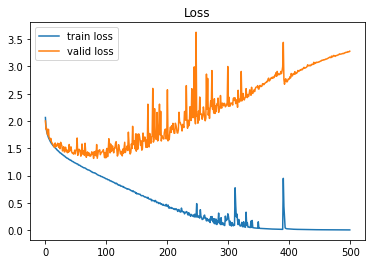

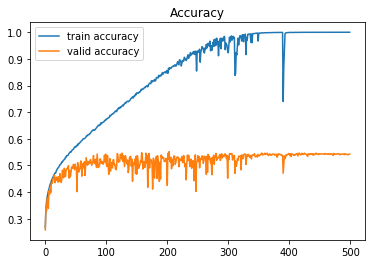

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()